In [2]:
# libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from unum import Unum
# data
from data.data import *

# setup
sns.set_theme()

In [3]:
# Read the data
raw_data: pd.DataFrame = data.parse_data('../test_data.txt')
df: pd.DataFrame = raw_data.loc[raw_data.name == 'Matrix multiply' ].copy()
print(df)

              name    space       min       max    median      mean        sd  \
4  Matrix multiply  4000000  0.003031  0.005681  0.003035  0.003064  0.000222   

         q1        q3  
4  0.003033  0.003037  


In [5]:
# Calcualte values
df['flops'] = df.apply(lambda row: row.space**3 * 2, axis=1)
df['flopss'] = df.apply(lambda row: data.flopss(row.flops, row['mean']), axis=1)
df['op_intensity'] = df.apply(lambda row: data.operational_intensity(row.flops, row.space**2 * 4 * 3), axis=1)

performance_peak: float = data.performance_peak(4, 4.1, 64)
memory_peak: float = data.memory_peak()
ridge: float = data.roofing_ridge(performance_peak, memory_peak)

df['performance'] = df.apply(lambda row: data.attainable_performance(memory_peak, row.op_intensity, performance_peak), axis=1)

print('Performance Peak: ', performance_peak)
print('Memory Peak: ', memory_peak)
print('Ridge: ', ridge)
print(df)

Performance Peak:  1049.6
Memory Peak:  42.94967296
Ridge:  24.437904357910153
              name    space       min       max    median      mean        sd  \
4  Matrix multiply  4000000  0.003031  0.005681  0.003035  0.003064  0.000222   

         q1        q3                  flops        flopss   op_intensity  \
4  0.003033  0.003037  128000000000000000000  4.177723e+22  666666.666667   

   performance  
4       1049.6  


In [6]:
# roofline data
operational_intensity = np.logspace(-2, 3, 500)  # generate a bunch of data for the x axys
df_roofline = pd.DataFrame({
    'name': 'roofline',
    'op_intensity': operational_intensity,
    'performance':  memory_peak * operational_intensity
})

df_roofline['performance'] = np.minimum(df_roofline['performance'], performance_peak)
print(df_roofline[307:])

         name  op_intensity  performance
307  roofline     11.916598   511.814005
308  roofline     12.194734   523.759853
309  roofline     12.479362   535.984519
310  roofline     12.770633   548.494511
311  roofline     13.068702   561.296490
..        ...           ...          ...
495  roofline    911.842520  1049.600000
496  roofline    933.125118  1049.600000
497  roofline    954.904456  1049.600000
498  roofline    977.192128  1049.600000
499  roofline   1000.000000  1049.600000

[193 rows x 3 columns]


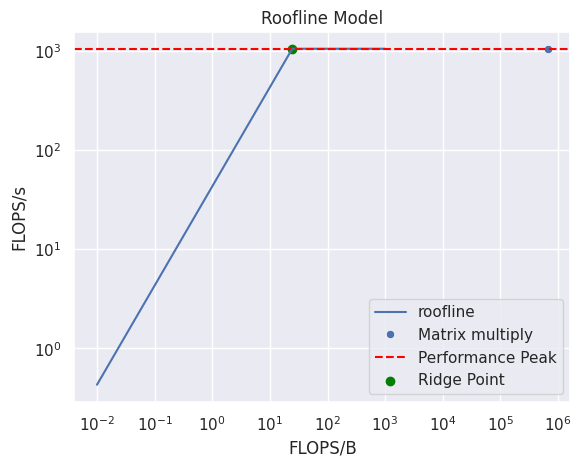

In [7]:
# plot
sns.lineplot(
    data=df_roofline, hue='name',
    x="op_intensity", y="performance",
)
sns.scatterplot(
    data=df, hue='name',
    x="op_intensity", y="performance",
)
# Performance peak line
plt.axhline(y=performance_peak, color='red', linestyle='--', label='Performance Peak')
# Ridge point
plt.scatter(ridge, ridge*memory_peak, color='green', label='Ridge Point')

plt.xscale('log')
plt.yscale('log')
plt.title('Roofline Model')
plt.xlabel('FLOPS/B')
plt.ylabel('FLOPS/s')
plt.legend()
plt.show()